In [5]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

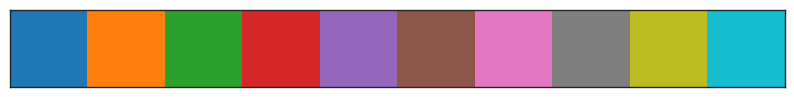

In [4]:
sns.palplot(palette)
plt.savefig("plots/palette.svg")

# Optuna fitting

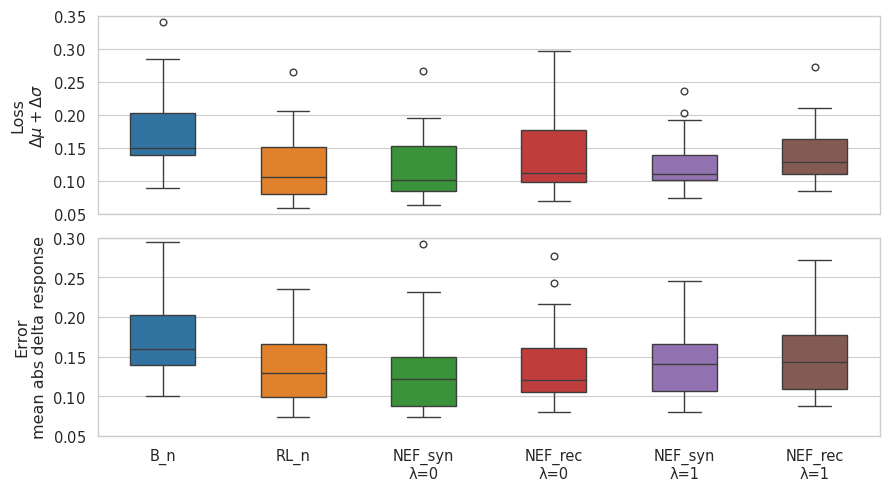

In [9]:
b_n = pd.read_pickle("data/B_n_carrabin_mar6_performance.pkl")
rl_n = pd.read_pickle("data/RL_n_carrabin_mar6_performance.pkl")
rl_nl = pd.read_pickle("data/RL_nl_carrabin_mar6_performance.pkl")
nef_rl_l0 = pd.read_pickle("data/NEF_RL_carrabin_mar6_performance.pkl")
nef_wm_l0 = pd.read_pickle("data/NEF_WM_carrabin_mar6_performance.pkl")
nef_rl_l1 = pd.read_pickle("data/NEF_RL_carrabin_mar10_performance.pkl")
nef_wm_l1 = pd.read_pickle("data/NEF_WM_carrabin_mar10_performance.pkl")
nef_rl_l0['type'] = "NEF_syn\nλ=0"
nef_wm_l0['type'] = "NEF_rec\nλ=0"
nef_rl_l1['type'] = "NEF_syn\nλ=1"
nef_wm_l1['type'] = "NEF_rec\nλ=1"
combined = pd.concat([b_n, rl_n, nef_rl_l0, nef_wm_l0, nef_rl_l1, nef_wm_l1], ignore_index=True)

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9,5), sharex=True)
    sns.boxplot(combined, x='type', y='loss', hue='type', ax=axes[0], palette=palette[:6], notch=False, width=0.5)
    sns.boxplot(combined, x='type', y='error', hue='type', ax=axes[1], palette=palette[:6], notch=False, width=0.5)
    axes[0].set(xlabel=None, ylabel='Loss\n'+'$\Delta \mu + \Delta \sigma$', ylim=[0.05, 0.35]) 
    axes[1].set(xlabel=None, ylabel='Error\n'+'mean abs delta response', ylim=[0.05, 0.3]) 
    plt.tight_layout()
    fig.savefig("plots/carrabin_performance.jpg", dpi=600)

# Compare parameters

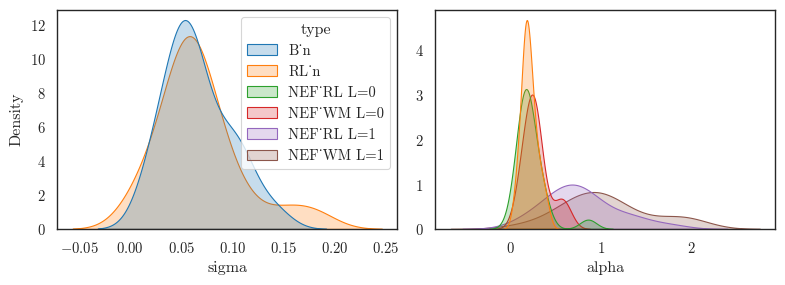

In [12]:
b_n = pd.read_pickle("data/B_n_carrabin_feb24_params.pkl")
rl_n = pd.read_pickle("data/RL_n_carrabin_feb24_params.pkl")
nef_rl_l0 = pd.read_pickle("data/NEF_RL_carrabin_mar6_params.pkl")
nef_wm_l0 = pd.read_pickle("data/NEF_WM_carrabin_mar6_params.pkl")
nef_rl_l1 = pd.read_pickle("data/NEF_RL_carrabin_mar10_params.pkl")
nef_wm_l1 = pd.read_pickle("data/NEF_WM_carrabin_mar10_params.pkl")
nef_rl_l0['type'] = "NEF_RL L=0"
nef_wm_l0['type'] = "NEF_WM L=0"
nef_rl_l1['type'] = "NEF_RL L=1"
nef_wm_l1['type'] = "NEF_WM L=1"
combined = pd.concat([b_n, rl_n, nef_rl_l0, nef_wm_l0, nef_rl_l1, nef_wm_l1], ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
sns.kdeplot(combined, x='sigma', hue='type', ax=axes[0], palette=palette[:6], fill=True, common_norm=False)
sns.kdeplot(combined, x='alpha', hue='type', ax=axes[1], palette=palette[:6], fill=True, common_norm=False)
# sns.kdeplot(combined, x='lambda', hue='type', ax=axes[2], palette=palette[:6], fill=True, common_norm=False)
axes[1].set(ylabel=None)
# axes[2].set(ylabel=None)
axes[1].get_legend().remove()
plt.tight_layout()

# Subplots for presentation

/tmp/ipykernel_501523/11715085.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(combined, x='type', y='loss', hue='type', ax=axes, palette=palette[:6], notch=False, width=0.5)


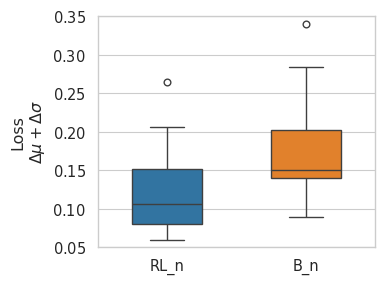

In [19]:
b_n = pd.read_pickle("data/B_n_carrabin_mar6_performance.pkl")
rl_n = pd.read_pickle("data/RL_n_carrabin_mar6_performance.pkl")
# rl_nl = pd.read_pickle("data/RL_nl_carrabin_mar6_performance.pkl")
# nef_rl_l0 = pd.read_pickle("data/NEF_RL_carrabin_mar6_performance.pkl")
# nef_wm_l0 = pd.read_pickle("data/NEF_WM_carrabin_mar6_performance.pkl")
# nef_rl_l1 = pd.read_pickle("data/NEF_RL_carrabin_mar10_performance.pkl")
# nef_wm_l1 = pd.read_pickle("data/NEF_WM_carrabin_mar10_performance.pkl")
# nef_rl_l0['type'] = "NEF_RL L=0"
# nef_wm_l0['type'] = "NEF_WM L=0"
# nef_rl_l1['type'] = "NEF_RL L=1"
# nef_wm_l1['type'] = "NEF_WM L=1"
combined = pd.concat([rl_n, b_n], ignore_index=True)

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,3), sharex=True)
    sns.boxplot(combined, x='type', y='loss', hue='type', ax=axes, palette=palette[:6], notch=False, width=0.5)
    # sns.boxplot(combined, x='type', y='error', hue='type', ax=axes[1], palette=palette[:6], notch=False, width=0.5)
    axes.set(xlabel=None, ylabel='Loss\n'+'$\Delta \mu + \Delta \sigma$', ylim=[0.05, 0.35]) 
    # axes[1].set(xlabel=None, ylabel='Error\n'+'mean abs delta response') 
    plt.tight_layout()
    fig.savefig("plots/carrabin_performance_subset1.jpg", dpi=600)